# Import Libraries

## Predicting Diabetes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

%matplotlib inline

In [2]:
df = pd.read_csv("./data/pima-data.csv")

In [3]:
df.shape

(768, 10)

In [4]:
df.head(6)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
5,5,116,74,0,0,25.6,0.201,30,0.0000,False


In [5]:
df.tail(3)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True
767,1,93,70,31,0,30.4,0.315,23,1.2214,False


In [6]:
df.isnull().values.any()

False

In [7]:
def plot_corr(x, size=11):
    corr = x.corr()
    fig, ax= plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

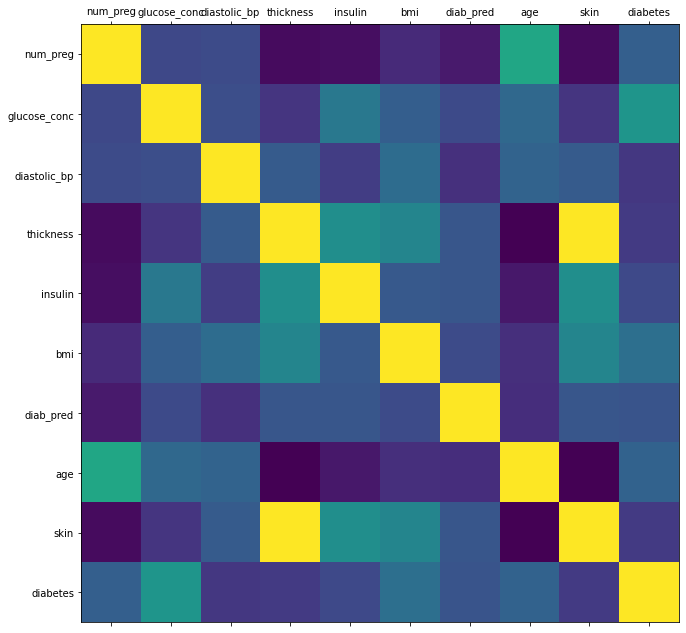

In [8]:
plot_corr(df)

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [10]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [11]:
del df["skin"]

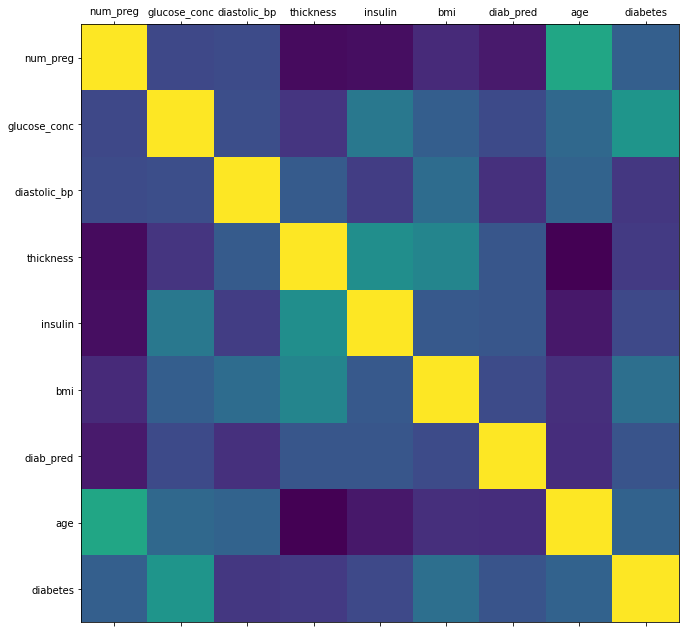

In [12]:
plot_corr(df)

In [13]:
 df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [14]:
diabetes_map = {True : 1, False: 0}

In [15]:
df["diabetes"] = df["diabetes"].map(diabetes_map)

In [16]:
 df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
num_true = len(df.loc[df["diabetes"]==True])
num_false = len(df.loc[df["diabetes"]==False])

print(f"Number of True cases: {num_true} ({num_true*100/(num_true+num_false)})")
print(f"Number of False cases: {num_false} ({num_false*100/(num_true+num_false)})")

Number of True cases: 268 (34.895833333333336)
Number of False cases: 500 (65.10416666666667)


In [18]:
from sklearn.model_selection import train_test_split
feature_col_names = ['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin', 'bmi', 'diab_pred', 'age']
predicted_class_names = ['diabetes']

X = df[feature_col_names].values
y = df[predicted_class_names].values
split_test_size = 0.30

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=1)

In [19]:
print(f"{(len(X_train)/len(df.index))*100} in training set")
print(f"{(len(X_test)/len(df.index))*100} in test set")

69.921875 in training set
30.078125 in test set


In [20]:
print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 183 (34.08%)
Training False : 354 (65.92%)

Test True      : 85 (36.80%)
Test False     : 146 (63.20%)


In [21]:
df.head()


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
print(f"rows in dataframe {len(df)}")
print(f"rows in glucose_conc: {len(df.loc[df['glucose_conc'] == 0])}")
print(f"rows in diastolic_bp: {len(df.loc[df['diastolic_bp']==0])}")
print(f"rows in thickness: {len(df.loc[df['thickness']==0])}")
print(f"rows in insulin: {len(df.loc[df['insulin']==0])}")
print(f"rows in bmi: {len(df.loc[df['bmi']==0])}")
print(f"rows in diab_pred: {len(df.loc[df['diab_pred']==0])}")
print(f"rows in age: {len(df.loc[df['age']==0])}")

rows in dataframe 768
rows in glucose_conc: 5
rows in diastolic_bp: 35
rows in thickness: 227
rows in insulin: 374
rows in bmi: 11
rows in diab_pred: 0
rows in age: 0


In [23]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")
X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

In [24]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train, y_train.ravel())

GaussianNB()

In [27]:
nb_predict_train = nb_model.predict(X_train)

from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_train, nb_predict_train)}")

Accuracy: 0.7392923649906891


In [28]:
nb_predict_test = nb_model.predict(X_test)

from sklearn import metrics

print(f"Accuracy: {metrics.accuracy_score(y_test, nb_predict_test)}")

Accuracy: 0.7705627705627706


In [30]:
print("Confusion Matrix")
print(f"{metrics.confusion_matrix(y_test, nb_predict_test)}")
print("")

print("Classification Report")
print(metrics.classification_report(y_test, nb_predict_test))

Confusion Matrix
[[123  23]
 [ 30  55]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.71      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=1, n_estimators=10)      # Create random forest object
rf_model.fit(X_train, y_train.ravel()) 

RandomForestClassifier(n_estimators=10, random_state=1)

In [34]:
rf_predict_train = rf_model.predict(X_train)


print(f"Accuracy: {metrics.accuracy_score(y_train, rf_predict_train)}")

Accuracy: 0.9869646182495344


In [35]:
rf_predict_test = rf_model.predict(X_test)


print(f"Accuracy: {metrics.accuracy_score(y_test, rf_predict_test)}")

Accuracy: 0.7532467532467533


In [36]:
print("Confusion Matrix")
print(f"{metrics.confusion_matrix(y_test, rf_predict_test)}")
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix
[[130  16]
 [ 41  44]]

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       146
           1       0.73      0.52      0.61        85

    accuracy                           0.75       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.75      0.75      0.74       231



In [40]:
from sklearn.linear_model import LogisticRegression

lr_model =LogisticRegression(C=0.7, random_state=1, solver='liblinear', max_iter=10000)
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

In [41]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))

Accuracy: 0.7706
[[131  15]
 [ 38  47]]

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       146
           1       0.76      0.55      0.64        85

    accuracy                           0.77       231
   macro avg       0.77      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



1st max value of 0.588 occured at C=1.400


Text(0, 0.5, 'recall score')

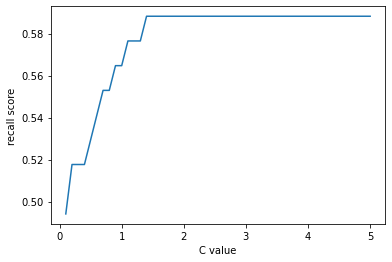

In [46]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, random_state=1, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")


1st max value of 0.765 occured at C=0.400


Text(0, 0.5, 'recall score')

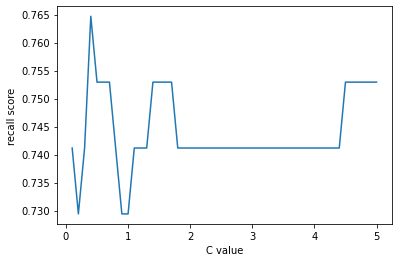

In [47]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=1, solver='liblinear')
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score):
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc

    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")



In [48]:
lr_model =LogisticRegression( class_weight="balanced", C=best_score_C_val, random_state=1, solver='liblinear')
lr_model.fit(X_train, y_train.ravel())
lr_predict_test = lr_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_predict_test)))
print(metrics.confusion_matrix(y_test, lr_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_predict_test))
print(metrics.recall_score(y_test, lr_predict_test))

Accuracy: 0.7706
[[113  33]
 [ 20  65]]

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       146
           1       0.66      0.76      0.71        85

    accuracy                           0.77       231
   macro avg       0.76      0.77      0.76       231
weighted avg       0.78      0.77      0.77       231

0.7647058823529411


In [49]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv_model = LogisticRegressionCV(n_jobs=-1, random_state=1, Cs=3, cv=10, refit=False, class_weight="balanced", max_iter=500)  # set number of jobs to -1 which uses all cores to parallelize
lr_cv_model.fit(X_train, y_train.ravel()) 

LogisticRegressionCV(Cs=3, class_weight='balanced', cv=10, max_iter=500,
                     n_jobs=-1, random_state=1, refit=False)

In [50]:
 lr_cv_predict_test = lr_cv_model.predict(X_test)

# training metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, lr_cv_predict_test)))
print(metrics.confusion_matrix(y_test, lr_cv_predict_test) )
print("")
print("Classification Report")
print(metrics.classification_report(y_test, lr_cv_predict_test))

Accuracy: 0.7922
[[118  28]
 [ 20  65]]

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       146
           1       0.70      0.76      0.73        85

    accuracy                           0.79       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.80      0.79      0.79       231

